In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler

# Train data

In [2]:
nRowsRead = 1000
df1 = pd.read_csv("mitbih_train.csv", delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'mitbih_train.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 188 columns


In [3]:
df1

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,0.756962,0.134177,0.000000,0.126582,0.189873,0.222785,0.212658,0.225316,0.205063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.921756,1.000000,0.616412,0.185115,0.101145,0.074427,0.055344,0.057252,0.089695,0.167939,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,1.000000,0.783898,0.444915,0.088983,0.046610,0.135593,0.144068,0.139831,0.169492,0.165254,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.928571,0.732804,0.214286,0.000000,0.044974,0.076720,0.047619,0.060847,0.042328,0.058201,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# For Corelation in Train Data

In [4]:
filename1 = df1
filename11 = 'mitbih_train.csv'
df1 = df1.dropna('columns') # drop columns with NaN
df1 = df1[[col for col in df1 if df1[col].nunique() > 1]] # keep columns where there are more than 1 unique values
if df1.shape[1] < 2:
    print(f'No correlation plots shown: The number of non-NaN or constant columns ({df1.shape[1]}) is less than 2')

In [5]:
corr1 = df1.corr()

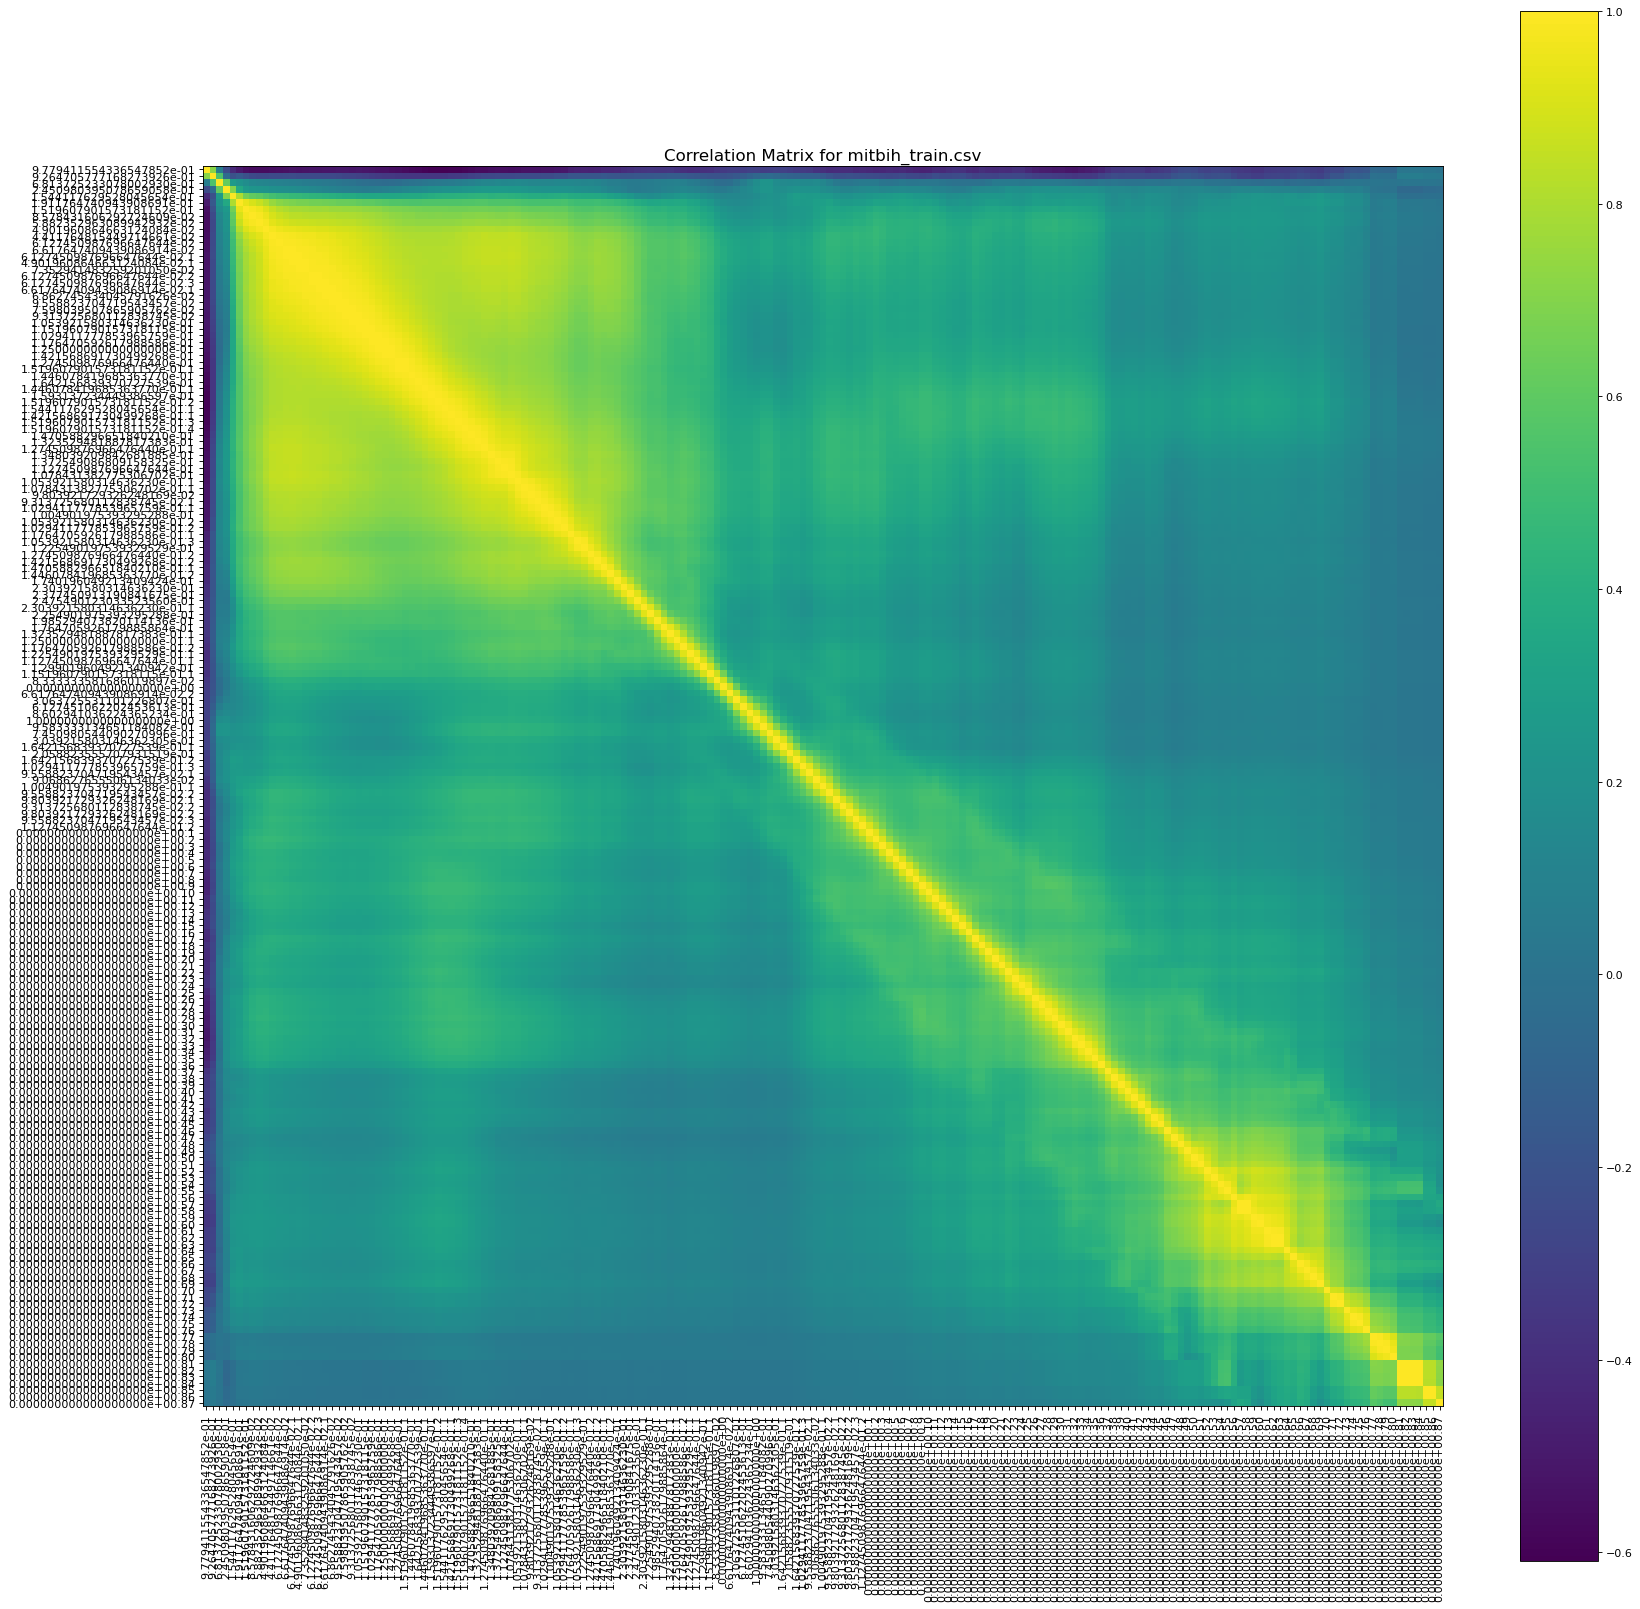

In [6]:
plt.figure(num=None, figsize=(25, 25), dpi=80, facecolor='w', edgecolor='k')
corrMat1 = plt.matshow(corr1, fignum = 1)
plt.xticks(range(len(corr1.columns)), corr1.columns, rotation=90)
plt.yticks(range(len(corr1.columns)), corr1.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat1)
plt.title(f'Correlation Matrix for {filename11}', fontsize=15)
plt.show();

# Plot per Column Distribution for Train data

In [7]:
nunique1 = df1.nunique()

In [8]:
df1 = df1[[col for col in df1 if nunique1[col] > 1 and nunique1[col] < 50]]

In [9]:
nRow, nCol = df1.shape
columnNames = list(df1)
nGraphPerRow = 5
nGraphShown = 20

<ipython-input-10-e5ae35be01c3>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)


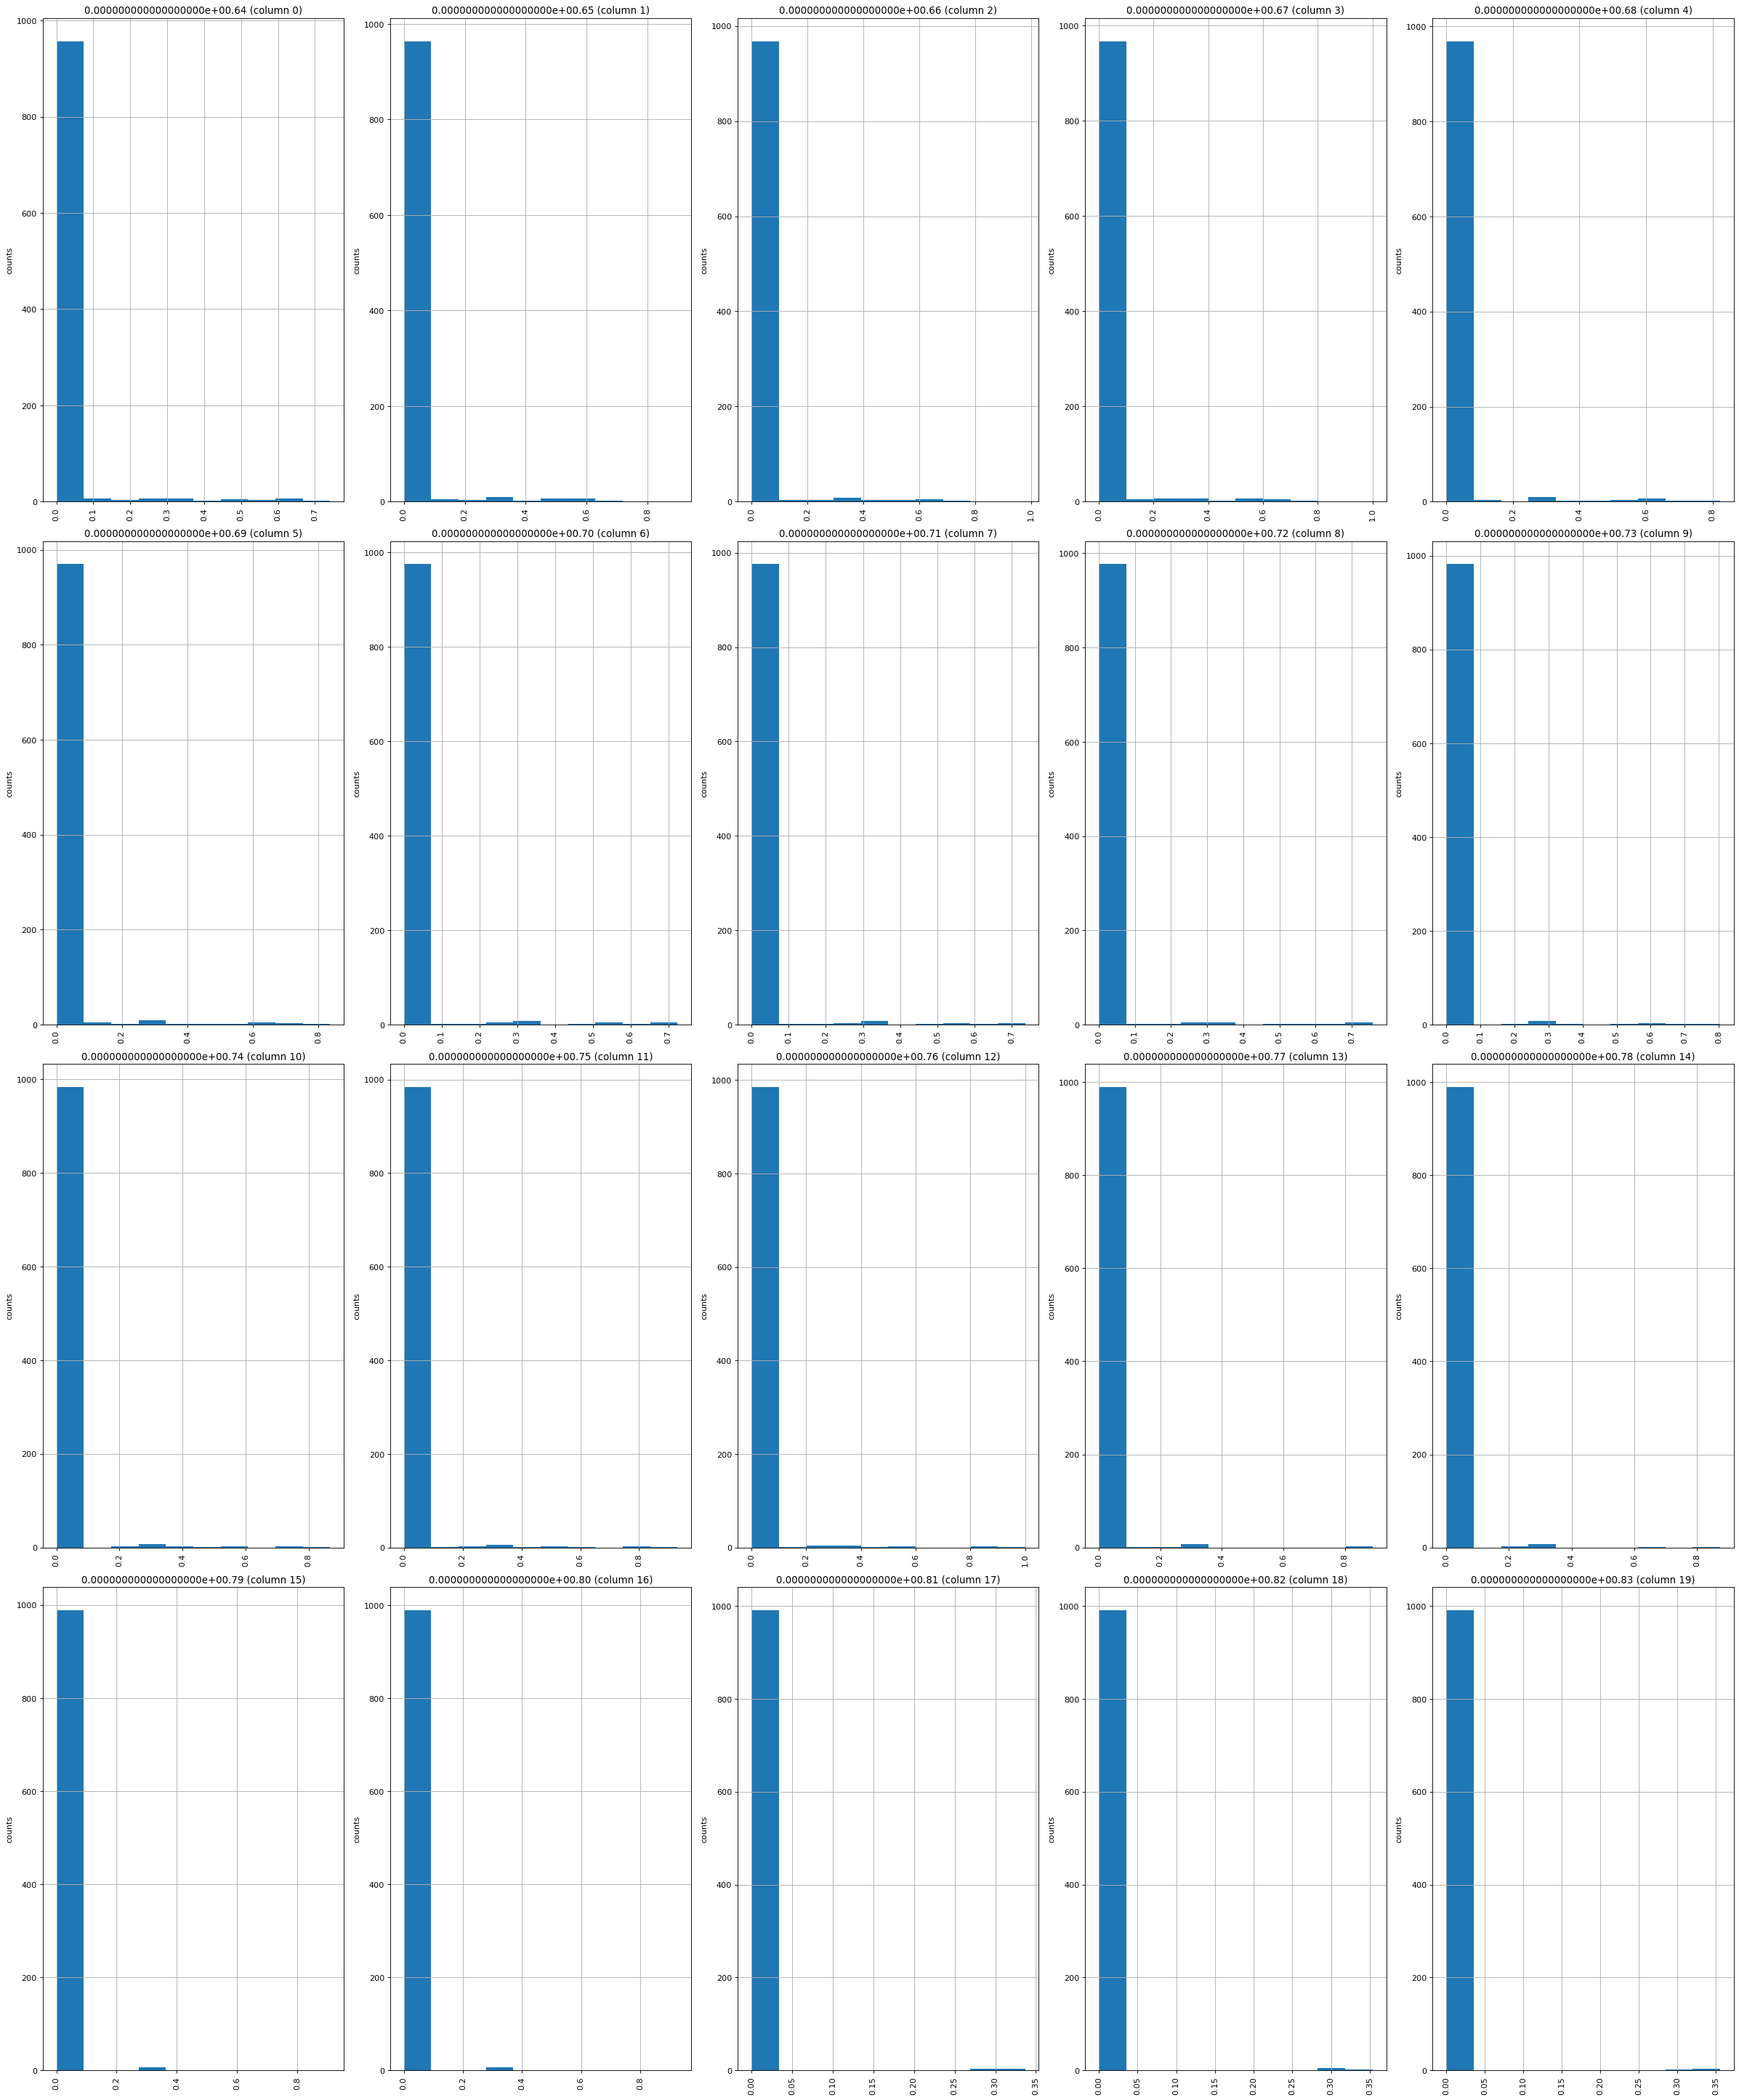

In [10]:
nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
for i in range(min(nCol, nGraphShown)):
    plt.subplot(nGraphRow, nGraphPerRow, i + 1)
    columnDf = df1.iloc[:, i]
    if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
        valueCounts = columnDf.value_counts()
        valueCounts.plot.bar()
    else:
        columnDf.hist()
    plt.ylabel('counts')
    plt.xticks(rotation = 90)
    plt.title(f'{columnNames[i]} (column {i})')
plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
plt.show()

# Plot Scatter Matrix for Train Data

In [11]:
df1 = df1.select_dtypes(include =[np.number]) # keep only numerical columns


In [12]:
# Remove rows and columns that would lead to df being singular
df1 = df1.dropna('columns')
df1 = df1[[col for col in df1 if df1[col].nunique() > 1]] # keep columns where there are more than 1 unique values

In [13]:
columnNames1 = list(df1)
if len(columnNames1) > 10: # reduce the number of columns for matrix inversion of kernel density plots
    columnNames1 = columnNames1[:10]
df1 = df1[columnNames1]

NameError: name 'df' is not defined

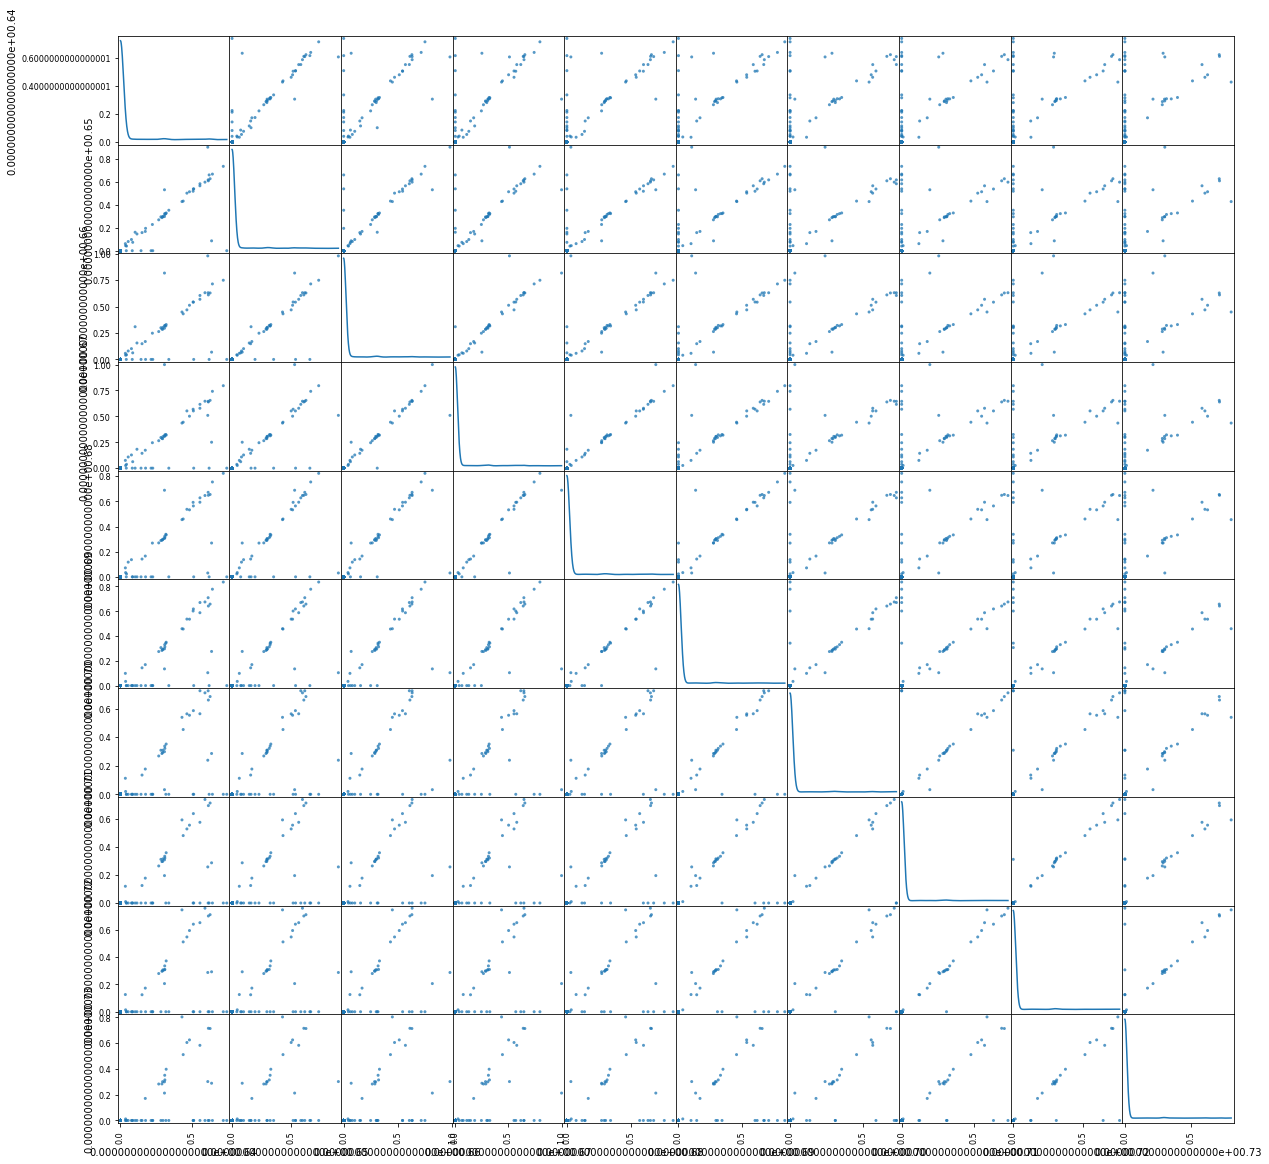

In [14]:
ax1 = pd.plotting.scatter_matrix(df1, alpha=0.75, figsize=[20, 20], diagonal='kde')
corrs1 = df.corr().values

for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
    ax1[i, j].annotate('Corr. coef = %.3f' % corrs1[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=5)
plt.suptitle('Scatter and Density Plot')
plt.show()

# Test data

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# mitbih_train.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('mitbih_test.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'mitbih_test.csv'
nRow2, nCol2 = df2.shape
print(f'There are {nRow2} rows and {nCol2} columns')

In [ ]:
df2

# For Corelation in Test Data

In [ ]:
filename2 = df2
filename22 = 'mitbih_test.csv'
df2 = df2.dropna('columns') # drop columns with NaN
df2 = df2[[col for col in df2 if df2[col].nunique() > 1]] # keep columns where there are more than 1 unique values
if df2.shape[1] < 2:
    print(f'No correlation plots shown: The number of non-NaN or constant columns ({df2.shape[1]}) is less than 2')

In [ ]:
corr2 = df2.corr()

In [ ]:
plt.figure(num=None, figsize=(25, 25), dpi=80, facecolor='w', edgecolor='k')
corrMat2 = plt.matshow(corr2, fignum = 1)
plt.xticks(range(len(corr2.columns)), corr2.columns, rotation=90)
plt.yticks(range(len(corr2.columns)), corr2.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat2)
plt.title(f'Correlation Matrix for {filename22}', fontsize=15)
plt.show()

# Plot per Column Distribution for Test data

In [ ]:
nunique2 = df2.nunique()

In [ ]:
df2 = df2[[col for col in df2 if nunique2[col] > 1 and nunique2[col] < 50]]

In [ ]:
nRow2, nCol2 = df2.shape
columnNames2 = list(df2)
nGraphPerRow2 = 5
nGraphShown2 = 20

In [ ]:
nGraphRow2 = (nCol2 + nGraphPerRow2 - 1) / nGraphPerRow2
plt.figure(num = None, figsize = (6 * nGraphPerRow2, 8 * nGraphRow2), dpi = 80, facecolor = 'w', edgecolor = 'k')
for j in range(min(nCol2, nGraphShown2)):
    plt.subplot(nGraphRow2, nGraphPerRow2, j + 1)
    columnDf2 = df2.iloc[:, i]
    if (not np.issubdtype(type(columnDf2.iloc[0]), np.number)):
        valueCounts2 = columnDf2.value_counts()
        valueCount2s.plot.bar()
    else:
        columnDf2.hist()
    plt.ylabel('counts')
    plt.xticks(rotation = 90)
    plt.title(f'{columnNames[j]} (column {j})')
plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
plt.show()

# Plot per Column Distribution for Test data

In [ ]:
df2 = df2.select_dtypes(include =[np.number]) # keep only numerical columns

In [ ]:
# Remove rows and columns that would lead to df being singular
df2 = df2.dropna('columns')
df2 = df2[[col for col in df2 if df2[col].nunique() > 1]] # keep columns where there are more than 1 unique values

In [ ]:
columnNames2 = list(df2)
if len(columnNames2) > 10: # reduce the number of columns for matrix inversion of kernel density plots
    columnNames2 = columnNames2[:10]
df2 = df2[columnNames2]

In [ ]:
ax2 = pd.plotting.scatter_matrix(df2, alpha=0.75, figsize=[20, 20], diagonal='kde')
corrs2 = df.corr().values

for i, j in zip(*plt.np.triu_indices_from(ax2, k = 1)):
    ax2[i, j].annotate('Corr. coef = %.3f' % corrs2[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=5)
plt.suptitle('Scatter and Density Plot')
plt.show()